## Import data

In [1]:
import pandas as pd

df = pd.read_csv('train.csv')
df.describe()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,999.562000,1230.742000,0.508000,1.536867,0.519333,4.361333,0.526667,32.067333,0.500133,140.582667,...,654.626667,1263.805333,2113.516000,12.293333,5.797333,10.860667,0.763333,0.506667,0.510667,1.488000
std,577.074342,440.517687,0.500103,0.810246,0.499793,4.367549,0.499455,18.179598,0.285799,35.535762,...,441.496076,428.900661,1079.558518,4.179346,4.366956,5.506614,0.425178,0.500122,0.500053,1.118342
min,0.000000,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,503.750000,838.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,...,299.750000,888.750000,1210.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1004.000000,1209.000000,1.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,...,585.000000,1262.000000,2102.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1491.250000,1611.750000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,171.000000,...,952.250000,1643.500000,3056.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1999.000000,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,...,1960.000000,1997.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Drop unnamed column and check null values

In [2]:
df = df.drop(df.columns[0], axis=1)
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Value counts of target (price_range)

In [3]:
df['price_range'].value_counts()

1    387
0    377
3    373
2    363
Name: price_range, dtype: int64

## See distribution of features

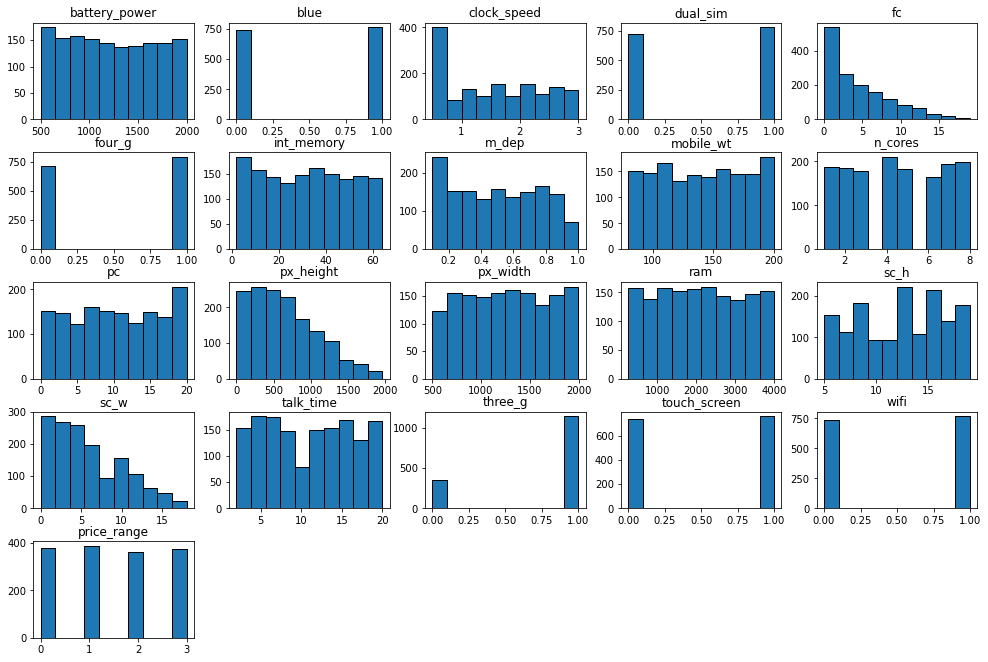

In [4]:
import matplotlib.pyplot as plt

# Plot distribution for each continuous variable
df.hist(bins=10, figsize=(15, 10), grid=False, edgecolor='black')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

## Pearson correlation analysis of feature to  target

In [5]:
df_corr = df.corr()['price_range'].abs().sort_values(ascending=False)
df_corr

price_range      1.000000
ram              0.916008
battery_power    0.207003
px_width         0.157188
px_height        0.147638
int_memory       0.049111
sc_w             0.041711
touch_screen     0.038025
blue             0.037148
three_g          0.032605
fc               0.031346
dual_sim         0.028463
mobile_wt        0.027891
n_cores          0.027631
pc               0.027037
four_g           0.014905
clock_speed      0.012378
wifi             0.010965
talk_time        0.006392
sc_h             0.004750
m_dep            0.001466
Name: price_range, dtype: float64

## Classify with Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

### train_test_split to see accuracy

In [7]:
from sklearn.model_selection import train_test_split
 
X = df.drop(columns = ['price_range'])
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### GridSearchCV to find most suitable parameter

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create the hyperparameter grid
params_grid = param_grid = { 
    'min_samples_split': np.arange(2, 5, 1),
    'n_estimators': np.arange(200, 500, 100),
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(rf, params_grid, cv = 10)
rf_cv.fit(X_train, y_train)

# Print best parameter after tuning
print(rf_cv.best_params_)
 
# Print how our model looks after hyper-parameter tuning
print(rf_cv.best_estimator_)

{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
RandomForestClassifier(max_features='sqrt', n_estimators=300, n_jobs=-1)


### Check classfication metrics

In [9]:
y_pred = rf_cv.predict(X_test) 

from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))
print("")
print(metrics.confusion_matrix(y_test, y_pred))
print("")
print(metrics.classification_report(y_test,y_pred))

0.8533333333333334

[[74  9  0  0]
 [ 8 69  4  0]
 [ 0  8 51  8]
 [ 0  0  7 62]]

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        83
           1       0.80      0.85      0.83        81
           2       0.82      0.76      0.79        67
           3       0.89      0.90      0.89        69

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



### Feature importance of Random Forest model

<AxesSubplot:>

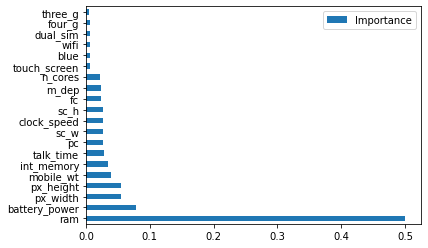

In [10]:
rf = RandomForestClassifier(max_features='log2', min_samples_split=4,
                       n_estimators=300, n_jobs=-1)
rf.fit(X, y)

def feat_importance(m,df):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)

importance = feat_importance(rf,X)
importance.plot(kind='barh')

## Classify with Gradient Boost

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.05, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test) 

print(metrics.accuracy_score(y_test, y_pred))
print("")
print(metrics.confusion_matrix(y_test, y_pred))
print("")
print(metrics.classification_report(y_test,y_pred))

0.7133333333333334

[[50 33  0  0]
 [ 4 66 11  0]
 [ 1 21 37  8]
 [ 0  1  7 61]]

              precision    recall  f1-score   support

           0       0.91      0.60      0.72        83
           1       0.55      0.81      0.65        81
           2       0.67      0.55      0.61        67
           3       0.88      0.88      0.88        69

    accuracy                           0.71       300
   macro avg       0.75      0.71      0.72       300
weighted avg       0.75      0.71      0.72       300



### Feature importance of Gradient Boost model

<AxesSubplot:>

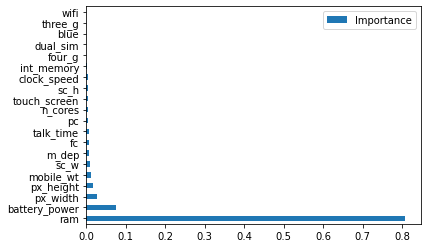

In [12]:
def feat_importance(m,df):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)

importance = feat_importance(gb_clf,X)
importance.plot(kind='barh')

## Classify with Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression 
params_grid = {'penalty': ['l2','none'], 
               'C': [0.01,0.1,1,10,100,1000]}


lr = LogisticRegression()
lr_cv = GridSearchCV(lr, params_grid, cv = 10)
lr_cv.fit(X_train, y_train)

# Print best parameter after tuning
print(lr_cv.best_params_)
 
# Print how our model looks after hyper-parameter tuning
print(lr_cv.best_estimator_)

/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:

/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:

/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:

/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:

{'C': 100, 'penalty': 'l2'}
LogisticRegression(C=100)


/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
y_pred = lr_cv.predict(X_test) 

print(metrics.accuracy_score(y_test, y_pred))
print("")
print(metrics.confusion_matrix(y_test, y_pred))
print("")
print(metrics.classification_report(y_test,y_pred))

0.65

[[64 16  3  0]
 [14 51 15  1]
 [ 0 16 26 25]
 [ 0  0 15 54]]

              precision    recall  f1-score   support

           0       0.82      0.77      0.80        83
           1       0.61      0.63      0.62        81
           2       0.44      0.39      0.41        67
           3       0.68      0.78      0.72        69

    accuracy                           0.65       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.65      0.65      0.65       300



### Feature importance of Logistic Regression model

/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature: battery_power  , Score: -0.00072
Feature: blue           , Score: 0.00032
Feature: clock_speed    , Score: 0.00099
Feature: dual_sim       , Score: 0.00031
Feature: fc             , Score: 0.00126
Feature: four_g         , Score: 0.00032
Feature: int_memory     , Score: 0.01637
Feature: m_dep          , Score: 0.00026
Feature: mobile_wt      , Score: 0.05165
Feature: n_cores        , Score: 0.00341
Feature: pc             , Score: 0.00451
Feature: px_height      , Score: -0.00185
Feature: px_width       , Score: 0.00105
Feature: ram            , Score: -0.00463
Feature: sc_h           , Score: 0.00788
Feature: sc_w           , Score: 0.00409
Feature: talk_time      , Score: 0.00576
Feature: three_g        , Score: 0.00038
Feature: touch_screen   , Score: 0.00037
Feature: wifi           , Score: 0.00036


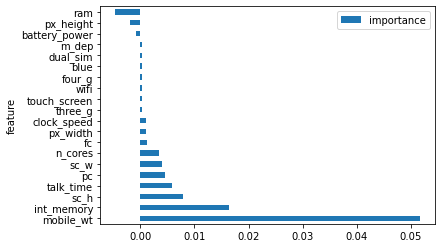

In [15]:
lr = LogisticRegression(C=10)
lr.fit(X, y)

# get importance
importance_list = lr.coef_[0]

for feature, importance in zip(X.columns, lr.coef_[0]):
    print(f'Feature: {feature:15}, Score: {round(importance, 5)}')
    
feature_importance = pd.DataFrame(X.columns, columns = ["feature"])
feature_importance["importance"] = importance_list
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()


## StandardScale features 

In [16]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler
# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

scaled_X_train, scaled_X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state=42)

## Principal Component Analysis

In [17]:
# Import our plotting module, and PCA class
from sklearn.decomposition import PCA
# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_X)
exp_variance = pca.explained_variance_ratio_

### Plot to see how much each component contribute to variance 

Text(0.5, 0, 'Principal Component')

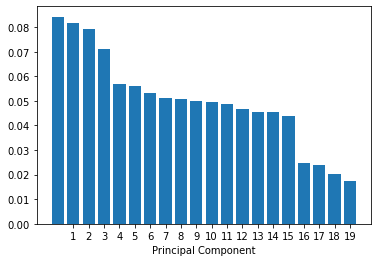

In [18]:
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
plt.xticks(np.arange(1,20, 1.0))
ax.set_xlabel('Principal Component')

### Cumulative explained variance (scree plot) to see how many components required to explain 85% variance

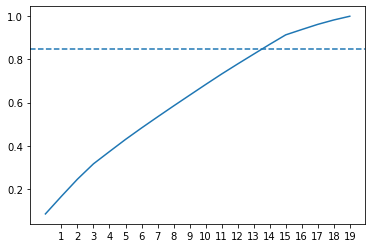

In [19]:
# Import numpy
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
plt.xticks(np.arange(1,20, 1.0))
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

### See the cumulative variance percentage of the components

In [20]:
pca = PCA(n_components = 0.85)
pca.fit(scaled_X)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

Cumulative Variances (Percentage):
[ 8.42606912 16.59304754 24.52218448 31.63545221 37.3177777  42.93344606
 48.23715315 53.3744159  58.43635396 63.41325946 68.36932067 73.23389959
 77.88747404 82.44618907 86.97821226]
Number of components: 15


### See the most important features in each component

In [21]:
print('Top 4 most important features in each component')
print('===============================================')
pca_components = abs(pca.components_)
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['pc', 'fc', 'sc_w', 'sc_h']
Component 1: ['three_g', 'four_g', 'pc', 'fc']
Component 2: ['px_height', 'px_width', 'sc_h', 'sc_w']
Component 3: ['px_width', 'sc_h', 'px_height', 'sc_w']
Component 4: ['int_memory', 'ram', 'blue', 'dual_sim']
Component 5: ['battery_power', 'wifi', 'talk_time', 'dual_sim']
Component 6: ['n_cores', 'blue', 'wifi', 'clock_speed']
Component 7: ['clock_speed', 'mobile_wt', 'ram', 'touch_screen']
Component 8: ['mobile_wt', 'm_dep', 'battery_power', 'clock_speed']
Component 9: ['touch_screen', 'wifi', 'int_memory', 'm_dep']
Component 10: ['m_dep', 'talk_time', 'dual_sim', 'mobile_wt']
Component 11: ['talk_time', 'int_memory', 'ram', 'dual_sim']
Component 12: ['n_cores', 'ram', 'blue', 'battery_power']
Component 13: ['clock_speed', 'talk_time', 'dual_sim', 'ram']
Component 14: ['wifi', 'battery_power', 'blue', 'ram']


In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print("")
print(metrics.confusion_matrix(y_test, y_pred))
print("")
print(metrics.classification_report(y_test,y_pred))

0.8633333333333333

[[75  8  0  0]
 [ 9 68  4  0]
 [ 0  7 53  7]
 [ 0  0  6 63]]

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        83
           1       0.82      0.84      0.83        81
           2       0.84      0.79      0.82        67
           3       0.90      0.91      0.91        69

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [24]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print("")
print(metrics.confusion_matrix(y_test, y_pred))
print("")
print(metrics.classification_report(y_test,y_pred))

0.88

[[77  6  0  0]
 [ 7 70  4  0]
 [ 0  9 52  6]
 [ 0  0  4 65]]

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        83
           1       0.82      0.86      0.84        81
           2       0.87      0.78      0.82        67
           3       0.92      0.94      0.93        69

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred = lr.predict(X_test) 

print(metrics.accuracy_score(y_test, y_pred))
print("")
print(metrics.confusion_matrix(y_test, y_pred))
print("")
print(metrics.classification_report(y_test,y_pred))

0.6533333333333333

[[64 16  3  0]
 [13 53 14  1]
 [ 0 16 26 25]
 [ 0  0 16 53]]

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        83
           1       0.62      0.65      0.64        81
           2       0.44      0.39      0.41        67
           3       0.67      0.77      0.72        69

    accuracy                           0.65       300
   macro avg       0.64      0.65      0.64       300
weighted avg       0.65      0.65      0.65       300



In [40]:
from sklearn.pipeline import Pipeline

_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = GradientBoostingClassifier()
gb_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

df_test = pd.read_csv('test.csv')
X_test = df_test.drop(df_test.columns[0], axis=1)

In [41]:
# train the model using the PCA components
gb_model.fit(X,y)
predictions = gb_model.predict(X_test)

In [48]:
df_test['price_range'] = predictions
output = df_test.drop(df_test.columns[1:-1], axis=1)
output.head(5)

,Unnamed: 0,price_range
0,1,1
1,2,1
2,6,2
3,9,0
4,17,2


In [50]:
output.to_csv('output.csv', index=False)